In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd drive

/content/drive


In [3]:
cd MyDrive

/content/drive/MyDrive


In [4]:
cd Data

/content/drive/MyDrive/Data


In [5]:
import pandas as pd
non_PRC = pd.read_csv('stand/0%/stand0.csv')
PRC = pd.read_csv('stand/0%/stand_par0.csv')
clinical_assessment = pd.read_excel('Clinical Assessment.xlsx')

In [6]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
import warnings
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

In [7]:
score = clinical_assessment.iloc[:,9]

In [8]:
del score[0]
del score[1]
del score[2]
del score[3]
del score[7]
del score[9]
del score[10]
del score[13]
del score[15]
del score[16]
del score[17]
del score[18]
del score[19]
del score[20]
del score[21]
del score[22]
del score[23]
del score[24]
del score[25]
del score[26]
del score[27]
del score[31]
del score[34]
del score[36]
del score[39]
del score[44]
del score[45]

In [9]:
y = []
for value in score:
    if value >= 45:
        y.append(1)
    else:
        y.append(0)
print(y)


[1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


## Non-paretic Side

In [10]:
df_non = pd.DataFrame(non_PRC)
y = pd.DataFrame(y)
non = pd.concat([y,df_non],axis=1)
colname = list(non.columns)
colname[0] = "score"
non.columns = colname
non.columns

Index(['score', 'Unnamed: 0', 'PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7',
       'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16',
       'PC17', 'PC18', 'PC19'],
      dtype='object')

In [11]:
X = non.loc[:,['PC2','PC4','PC10']]
y = non['score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=123, stratify=y)

### Logistic Regression

In [12]:
lr_model = LogisticRegression()

# 선택된 특성으로 모델 학습
lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred_lr)
print("Confusion Matrix:\n", conf_matrix)
# 정확도 계산
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("Test Accuracy:", accuracy_lr)

# f1-score 계산
f1_lr = f1_score(y_test, y_pred_lr)
print("f1-score:", f1_lr)

# auc 계산
auc_lr = roc_auc_score(y_test,y_pred_lr)
print("AUC:",auc_lr)

# 분류 보고서 출력
classification_rep_lr = classification_report(y_test, y_pred_lr)
print("Classification Report:\n", classification_rep_lr)

Confusion Matrix:
 [[2 0]
 [0 6]]
Test Accuracy: 1.0
f1-score: 1.0
AUC: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         6

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8



### RandomForest

In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier


param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


grid_search = GridSearchCV(RandomForestClassifier(random_state=123), param_grid, cv=5, scoring='accuracy')


grid_search.fit(X_train, y_train)


best_rf_model = grid_search.best_estimator_
best_params = grid_search.best_params_
print("Best Random Forest Model:", best_rf_model)
print("Best Hyperparameters:", best_params)

y_pred_best_rf = best_rf_model.predict(X_test)


conf_matrix_best = confusion_matrix(y_test, y_pred_best_rf)
print("Confusion Matrix:\n", conf_matrix_best)

accuracy_best_rf = accuracy_score(y_test, y_pred_best_rf)
print("Test Accuracy with Best Model:", accuracy_best_rf)

f1_best_rf = f1_score(y_test, y_pred_best_rf)
print("f1-score with Best Model:", f1_best_rf)

auc_best_rf = roc_auc_score(y_test, y_pred_best_rf)
print("AUC with Best Model:", auc_best_rf)

classification_rep_best_rf = classification_report(y_test, y_pred_best_rf)
print("Classification Report with Best Model:\n", classification_rep_best_rf)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Best Random Forest Model: RandomForestClassifier(random_state=123)
Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Confusion Matrix:
 [[2 0]
 [0 6]]
Test Accuracy with Best Model: 1.0
f1-score with Best Model: 1.0
AUC with Best Model: 1.0
Classification Report with Best Model:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         6

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8



### SVM Linear

In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear'],
    'degree':[2,3,4]
}


grid_search = GridSearchCV(SVC(random_state=123), param_grid, cv=5, scoring='accuracy')


grid_search.fit(X_train, y_train)


best_svm_model = grid_search.best_estimator_
best_params = grid_search.best_params_
print("Best SVM Model:", best_svm_model)
print("Best Hyperparameters:", best_params)


y_pred_best_svm_linear = best_svm_model.predict(X_test)


conf_matrix_best = confusion_matrix(y_test, y_pred_best_svm_linear)
print("Confusion Matrix:\n", conf_matrix_best)

accuracy_best_svm_linear = accuracy_score(y_test, y_pred_best_svm_linear)
print("Test Accuracy with Best Model:", accuracy_best_svm_linear)

f1_best_svm_linear = f1_score(y_test, y_pred_best_svm_linear)
print("f1-score with Best Model:", f1_best_svm_linear)

y_scores_best_svm = best_svm_model.decision_function(X_test)
auc_best_svm_linear = roc_auc_score(y_test, y_scores_best_svm)
print("AUC with Best Model:", auc_best_svm_linear)

classification_rep_best_svm_linear = classification_report(y_test, y_pred_best_svm_linear)
print("Classification Report with Best Model:\n", classification_rep_best_svm_linear)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Best SVM Model: SVC(C=10, degree=2, kernel='linear', random_state=123)
Best Hyperparameters: {'C': 10, 'degree': 2, 'kernel': 'linear'}
Confusion Matrix:
 [[2 0]
 [0 6]]
Test Accuracy with Best Model: 1.0
f1-score with Best Model: 1.0
AUC with Best Model: 1.0
Classification Report with Best Model:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         6

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8



### SVM Poly

In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['poly'],
    'degree': [2, 3, 4],
}


grid_search = GridSearchCV(SVC(random_state=123), param_grid, cv=5, scoring='accuracy')


grid_search.fit(X_train, y_train)


best_svm_model = grid_search.best_estimator_
best_params = grid_search.best_params_
print("Best SVM Model:", best_svm_model)
print("Best Hyperparameters:", best_params)


y_pred_best_svm_poly = best_svm_model.predict(X_test)


conf_matrix_best = confusion_matrix(y_test, y_pred_best_svm_poly)
print("Confusion Matrix:\n", conf_matrix_best)

accuracy_best_svm_poly = accuracy_score(y_test, y_pred_best_svm_poly)
print("Test Accuracy with Best Model:", accuracy_best_svm_poly)

f1_best_svm_poly = f1_score(y_test, y_pred_best_svm_poly)
print("f1-score with Best Model:", f1_best_svm_poly)

y_scores_best_svm_poly = best_svm_model.decision_function(X_test)
auc_best_svm_poly = roc_auc_score(y_test, y_scores_best_svm_poly)
print("AUC with Best Model:", auc_best_svm_poly)

classification_rep_best_svm_poly = classification_report(y_test, y_pred_best_svm_poly)
print("Classification Report with Best Model:\n", classification_rep_best_svm_poly)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Best SVM Model: SVC(C=0.1, degree=2, kernel='poly', random_state=123)
Best Hyperparameters: {'C': 0.1, 'degree': 2, 'kernel': 'poly'}
Confusion Matrix:
 [[0 2]
 [0 6]]
Test Accuracy with Best Model: 0.75
f1-score with Best Model: 0.8571428571428571
AUC with Best Model: 0.25
Classification Report with Best Model:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.75      1.00      0.86         6

    accuracy                           0.75         8
   macro avg       0.38      0.50      0.43         8
weighted avg       0.56      0.75      0.64         8



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### XGBoost

In [16]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb


param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
}


grid_search = GridSearchCV(xgb.XGBClassifier(random_state=123), param_grid, cv=5, scoring='accuracy')


grid_search.fit(X_train, y_train)


best_xgb_model = grid_search.best_estimator_
best_params = grid_search.best_params_
print("Best XGBoost Model:", best_xgb_model)
print("Best Hyperparameters:", best_params)


y_pred_best_xgb = best_xgb_model.predict(X_test)

conf_matrix_best = confusion_matrix(y_test, y_pred_best_xgb)
print("Confusion Matrix:\n", conf_matrix_best)

accuracy_best_xgb = accuracy_score(y_test, y_pred_best_xgb)
print("Test Accuracy with Best Model:", accuracy_best_xgb)

f1_best_xgb = f1_score(y_test, y_pred_best_xgb)
print("f1-score with Best Model:", f1_best_xgb)

auc_best_xgb = roc_auc_score(y_test, y_pred_best_xgb)
print("AUC with Best Model:", auc_best_xgb)

classification_rep_best_xgb = classification_report(y_test, y_pred_best_xgb)
print("Classification Report with Best Model:\n", classification_rep_best_xgb)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Best XGBoost Model: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=123, ...)
Best Hyperparameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}
Confusion Matrix:
 [[0 2]
 [0 6]]
Test Accuracy with Best Model: 0.75
f1-score with Best Model: 0.8571428571428571
AUC with Best Model: 0.5
Clas

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


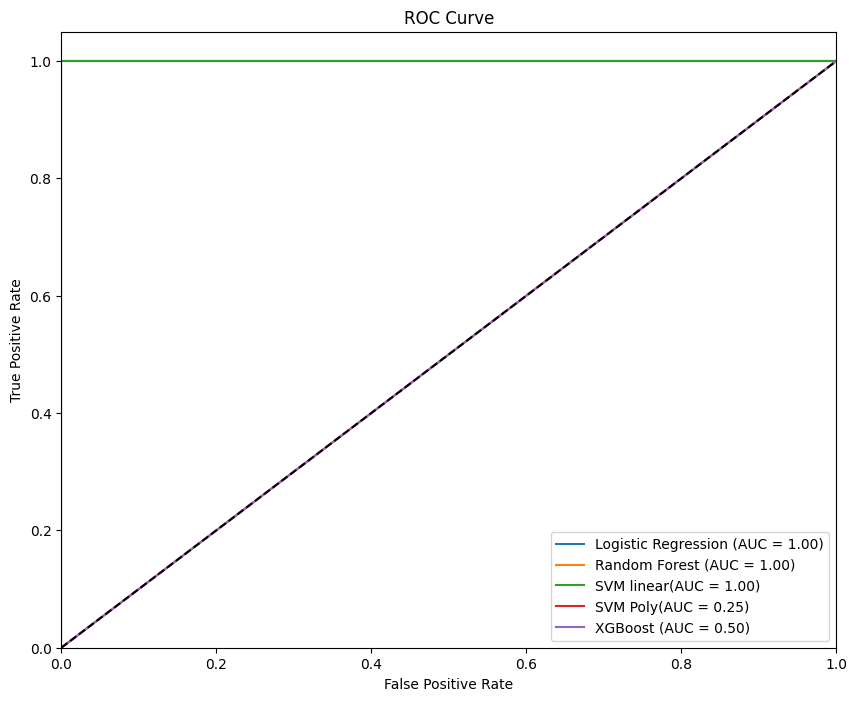

In [17]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, auc

fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_lr)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_best_rf)
fpr_svm_linear, tpr_svm_linear, _ = roc_curve(y_test, y_pred_best_svm_linear)
fpr_svm_poly, tpr_svm_poly, _ = roc_curve(y_test, y_pred_best_svm_poly)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_pred_best_xgb)


# ROC 곡선 그리기
plt.figure(figsize=(10, 8))
plt.plot(fpr_lr, tpr_lr, label='Logistic Regression (AUC = %0.2f)' % auc_lr)
plt.plot(fpr_rf, tpr_rf, label='Random Forest (AUC = %0.2f)' % auc_best_rf)
plt.plot(fpr_svm_linear, tpr_svm_linear, label='SVM linear(AUC = %0.2f)' % auc_best_svm_linear)
plt.plot(fpr_svm_poly, tpr_svm_poly, label='SVM Poly(AUC = %0.2f)' % auc_best_svm_poly)
plt.plot(fpr_xgb, tpr_xgb, label='XGBoost (AUC = %0.2f)' % auc_best_xgb)

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

## Paretic Side

In [18]:
df_par = pd.DataFrame(PRC)
y = pd.DataFrame(y)
par = pd.concat([y,df_par],axis=1)
colname = list(par.columns)
colname[0] = "score"

In [19]:
import random
random.seed(1)
X = par.loc[:,['PC1','PC2','PC6','PC14']]
y = par['score']
X_train , X_test , y_train , y_test  = train_test_split(X,y,test_size = 0.4,random_state=123,stratify=y)

### Logistic Regression

In [20]:
lr_model = LogisticRegression()

lr_model.fit(X_train, y_train)

y_pred_par_lr = lr_model.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred_par_lr)
print("Confusion Matrix:\n", conf_matrix)
# 정확도 계산
accuracy_lr_ps = accuracy_score(y_test, y_pred_par_lr)
print("Test Accuracy:", accuracy_lr_ps)

# f1-score 계산
f1_lr_ps = f1_score(y_test, y_pred_par_lr)
print("f1-score:", f1_lr_ps)

# AUC 계산
auc_lr_ps = roc_auc_score(y_test,y_pred_par_lr)
print("AUC:",auc_lr_ps)


classification_rep_lr = classification_report(y_test, y_pred_par_lr)
print("Classification Report:\n", classification_rep_lr)

Confusion Matrix:
 [[1 1]
 [0 6]]
Test Accuracy: 0.875
f1-score: 0.923076923076923
AUC: 0.75
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.86      1.00      0.92         6

    accuracy                           0.88         8
   macro avg       0.93      0.75      0.79         8
weighted avg       0.89      0.88      0.86         8



### RandomForest

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


grid_search = GridSearchCV(RandomForestClassifier(random_state=123), param_grid, cv=5, scoring='accuracy')


grid_search.fit(X_train, y_train)

# 최적의 모델과 하이퍼파라미터 출력
best_rf_model = grid_search.best_estimator_
best_params = grid_search.best_params_
print("Best Random Forest Model:", best_rf_model)
print("Best Hyperparameters:", best_params)

# 최적의 모델로 테스트 데이터에 대한 예측 수행
y_pred_best_par_rf = best_rf_model.predict(X_test)

# 성능 메트릭 계산
conf_matrix_best = confusion_matrix(y_test, y_pred_best_par_rf)
print("Confusion Matrix:\n", conf_matrix_best)

accuracy_best_par_rf = accuracy_score(y_test, y_pred_best_par_rf)
print("Test Accuracy with Best Model:", accuracy_best_par_rf)

f1_best_par_rf = f1_score(y_test, y_pred_best_par_rf)
print("F1-score with Best Model:", f1_best_par_rf)

auc_best_par_rf = roc_auc_score(y_test, y_pred_best_par_rf)
print("AUC with Best Model:", auc_best_par_rf)

classification_rep_best_par_rf = classification_report(y_test, y_pred_best_par_rf)
print("Classification Report with Best Model:\n", classification_rep_best_par_rf)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Best Random Forest Model: RandomForestClassifier(random_state=123)
Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Confusion Matrix:
 [[0 2]
 [1 5]]
Test Accuracy with Best Model: 0.625
F1-score with Best Model: 0.7692307692307692
AUC with Best Model: 0.4166666666666667
Classification Report with Best Model:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.71      0.83      0.77         6

    accuracy                           0.62         8
   macro avg       0.36      0.42      0.38         8
weighted avg       0.54      0.62      0.58         8



### SVM Linear

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear'],
    'degree':[2,3,4]
}


grid_search = GridSearchCV(SVC(random_state=123), param_grid, cv=5, scoring='accuracy')


grid_search.fit(X_train, y_train)


best_svm_model = grid_search.best_estimator_
best_params = grid_search.best_params_
print("Best SVM Model:", best_svm_model)
print("Best Hyperparameters:", best_params)


y_pred_best_par_svm_linear = best_svm_model.predict(X_test)

# 성능 메트릭 계산
conf_matrix_best = confusion_matrix(y_test, y_pred_best_par_svm_linear)
print("Confusion Matrix:\n", conf_matrix_best)

accuracy_best_par_svm_linear = accuracy_score(y_test, y_pred_best_par_svm_linear)
print("Test Accuracy with Best Model:", accuracy_best_par_svm_linear)

f1_best_par_svm_linear = f1_score(y_test, y_pred_best_par_svm_linear)
print("F1-score with Best Model:", f1_best_par_svm_linear)

y_scores_best_par_svm_linear = best_svm_model.decision_function(X_test)
auc_best_par_svm_linear = roc_auc_score(y_test, y_scores_best_par_svm_linear)
print("AUC with Best Model:", auc_best_par_svm_linear)

classification_rep_best_par_svm = classification_report(y_test, y_pred_best_par_svm_linear)
print("Classification Report with Best Model:\n", classification_rep_best_par_svm)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Best SVM Model: SVC(C=10, degree=2, kernel='linear', random_state=123)
Best Hyperparameters: {'C': 10, 'degree': 2, 'kernel': 'linear'}
Confusion Matrix:
 [[2 0]
 [1 5]]
Test Accuracy with Best Model: 0.875
F1-score with Best Model: 0.9090909090909091
AUC with Best Model: 1.0
Classification Report with Best Model:
               precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      0.83      0.91         6

    accuracy                           0.88         8
   macro avg       0.83      0.92      0.85         8
weighted avg       0.92      0.88      0.88         8



### SVM Poly

In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['poly'],
    'degree': [2, 3, 4],
}


grid_search = GridSearchCV(SVC(random_state=123), param_grid, cv=5, scoring='accuracy')


grid_search.fit(X_train, y_train)


best_svm_model = grid_search.best_estimator_
best_params = grid_search.best_params_
print("Best SVM Model:", best_svm_model)
print("Best Hyperparameters:", best_params)


y_pred_best_par_svm_poly = best_svm_model.predict(X_test)

# 성능 메트릭 계산
conf_matrix_best = confusion_matrix(y_test, y_pred_best_par_svm_poly)
print("Confusion Matrix:\n", conf_matrix_best)

accuracy_best_par_svm_poly = accuracy_score(y_test, y_pred_best_par_svm_poly)
print("Test Accuracy with Best Model:", accuracy_best_par_svm_poly)

f1_best_par_svm_poly = f1_score(y_test, y_pred_best_par_svm_poly)
print("F1-score with Best Model:", f1_best_par_svm_poly)

y_scores_best_par_svm_poly = best_svm_model.decision_function(X_test)
auc_best_par_svm_poly = roc_auc_score(y_test, y_scores_best_par_svm_poly)
print("AUC with Best Model:", auc_best_par_svm_poly)

classification_rep_best_par_svm = classification_report(y_test, y_pred_best_par_svm_poly)
print("Classification Report with Best Model:\n", classification_rep_best_par_svm)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Best SVM Model: SVC(C=0.1, degree=2, kernel='poly', random_state=123)
Best Hyperparameters: {'C': 0.1, 'degree': 2, 'kernel': 'poly'}
Confusion Matrix:
 [[0 2]
 [0 6]]
Test Accuracy with Best Model: 0.75
F1-score with Best Model: 0.8571428571428571
AUC with Best Model: 1.0
Classification Report with Best Model:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.75      1.00      0.86         6

    accuracy                           0.75         8
   macro avg       0.38      0.50      0.43         8
weighted avg       0.56      0.75      0.64         8



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### XGBoost

In [24]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb


param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
}


grid_search = GridSearchCV(xgb.XGBClassifier(random_state=123), param_grid, cv=5, scoring='accuracy')


grid_search.fit(X_train, y_train)


best_xgb_model = grid_search.best_estimator_
best_params = grid_search.best_params_
print("Best XGBoost Model:", best_xgb_model)
print("Best Hyperparameters:", best_params)


y_pred_best_par_xgb = best_xgb_model.predict(X_test)

conf_matrix_best = confusion_matrix(y_test, y_pred_best_par_xgb)
print("Confusion Matrix:\n", conf_matrix_best)

accuracy_best_par_xgb = accuracy_score(y_test, y_pred_best_par_xgb)
print("Test Accuracy with Best Model:", accuracy_best_par_xgb)

f1_best_par_xgb = f1_score(y_test, y_pred_best_par_xgb)
print("F1-score with Best Model:", f1_best_par_xgb)

auc_best_par_xgb = roc_auc_score(y_test, y_pred_best_par_xgb)
print("AUC with Best Model:", auc_best_par_xgb)

classification_rep_best_par_xgb = classification_report(y_test, y_pred_best_par_xgb)
print("Classification Report with Best Model:\n", classification_rep_best_par_xgb)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Best XGBoost Model: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=123, ...)
Best Hyperparameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}
Confusion Matrix:
 [[0 2]
 [0 6]]
Test Accuracy with Best Model: 0.75
F1-score with Best Model: 0.8571428571428571
AUC with Best Model: 0.5
Clas

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


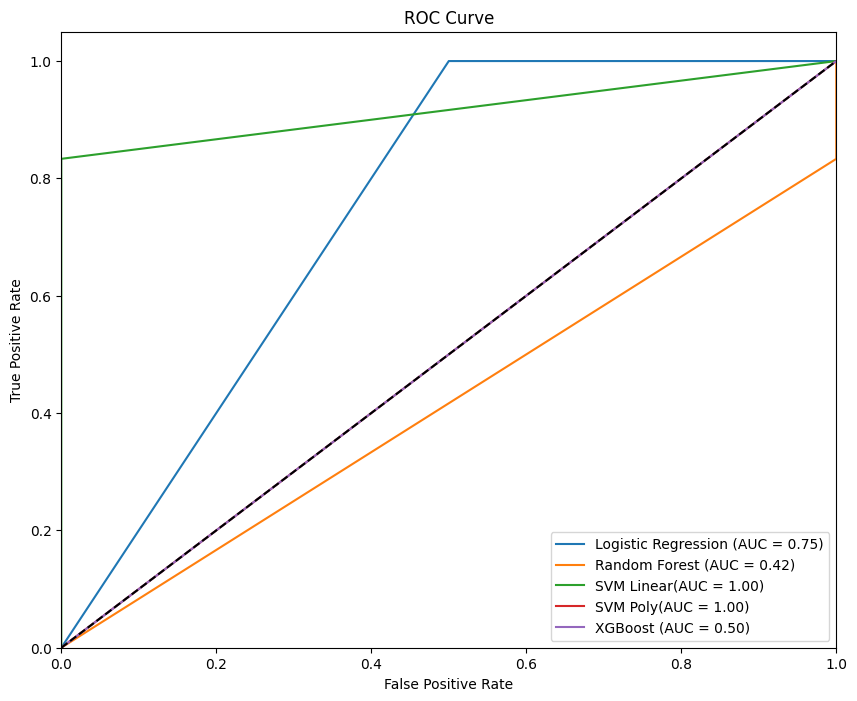

In [25]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, auc

fpr_par_lr, tpr_par_lr, _ = roc_curve(y_test, y_pred_par_lr)  # Logistic Regression
fpr_par_rf, tpr_par_rf, _ = roc_curve(y_test, y_pred_best_par_rf)  # Random Forest
fpr_par_svm_linear, tpr_par_svm_linear, _ = roc_curve(y_test, y_pred_best_par_svm_linear)
fpr_par_svm_poly, tpr_par_svm_poly, _ = roc_curve(y_test, y_pred_best_par_svm_poly)  # SVM
fpr_par_xgb, tpr_par_xgb, _ = roc_curve(y_test, y_pred_best_par_xgb)  # XGBoost


# ROC 곡선 그리기
plt.figure(figsize=(10, 8))
plt.plot(fpr_par_lr, tpr_par_lr, label='Logistic Regression (AUC = %0.2f)' % auc_lr_ps)
plt.plot(fpr_par_rf, tpr_par_rf, label='Random Forest (AUC = %0.2f)' % auc_best_par_rf)
plt.plot(fpr_par_svm_linear, tpr_par_svm_linear, label='SVM Linear(AUC = %0.2f)' % auc_best_par_svm_linear)
plt.plot(fpr_par_svm_poly, tpr_par_svm_poly, label='SVM Poly(AUC = %0.2f)' % auc_best_par_svm_poly)
plt.plot(fpr_par_xgb, tpr_par_xgb, label='XGBoost (AUC = %0.2f)' % auc_best_par_xgb)

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [26]:
### AUC 결과
result = {'model':["logistic","RandomForest","SVM(Linear)","SVM(Poly)","XGBoost"],
          'f1_score':[f1_lr,f1_best_rf,f1_best_svm_linear,f1_best_svm_poly,f1_best_xgb],
          'AUC':[auc_lr,auc_best_rf,auc_best_svm_linear,auc_best_svm_poly,auc_best_xgb],
          'paretic_f1_score':[f1_lr_ps,f1_best_par_rf,f1_best_par_svm_linear,f1_best_par_svm_poly,f1_best_par_xgb],
          'Paretic_AUC':[auc_lr_ps,auc_best_par_rf,auc_best_par_svm_linear,auc_best_par_svm_poly,auc_best_par_xgb]}

In [27]:
result = pd.DataFrame(result)
result

,model,f1_score,AUC,paretic_f1_score,Paretic_AUC
0,logistic,1.000000,1.00,0.923077,0.750000
1,RandomForest,1.000000,1.00,0.769231,0.416667
2,SVM(Linear),1.000000,1.00,0.909091,1.000000
3,SVM(Poly),0.857143,0.25,0.857143,1.000000
4,XGBoost,0.857143,0.50,0.857143,0.500000
